In [52]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import plotly.express as px

In [53]:
data_path = '../../data/modulo2/coches/'
files = os.listdir(data_path)
files

['toyota.xlsx', 'bmw.xlsx', 'audi.xlsx']

In [54]:
# Definición de los DataSets
ty = pd.read_excel(data_path + files[0])
bmw = pd.read_excel(data_path + files[1])
audi = pd.read_excel(data_path + files[2])

In [55]:
audi['age'] = 2022 - audi['year']
bmw['age'] = 2022 - bmw['year']
ty['age'] = 2022 - ty['year']

# Calidad de datos

In [56]:
names = list(ty.columns)
ty.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,GT86,2016.0,16000.0,Manual,24089.0,Petrol,265.0,36.2,2.0,6.0
1,GT86,2017.0,15995.0,Manual,18615.0,Petrol,145.0,36.2,2.0,5.0
2,GT86,2015.0,13998.0,Manual,27469.0,Petrol,265.0,36.2,2.0,7.0
3,GT86,2017.0,18998.0,Manual,14736.0,Petrol,150.0,36.2,2.0,5.0
4,GT86,2017.0,17498.0,Manual,36284.0,Petrol,145.0,36.2,2.0,5.0
5,GT86,2017.0,15998.0,Manual,26919.0,Petrol,260.0,36.2,2.0,5.0
6,GT86,2017.0,18522.0,Manual,10456.0,Petrol,145.0,36.2,2.0,5.0
7,GT86,2017.0,18995.0,Manual,12340.0,Petrol,145.0,36.2,2.0,5.0
8,GT86,2020.0,27998.0,Manual,516.0,Petrol,150.0,33.2,2.0,2.0
9,GT86,2016.0,13990.0,Manual,37999.0,Petrol,265.0,36.2,2.0,6.0


In [57]:
ty.year.unique()

array([2016., 2017., 2015., 2020., 2013., 2019., 2018., 2014., 2012.,
       2005., 2003., 2004., 2001., 2008., 2007., 2010., 2011., 2006.,
       2009., 2002., 1999., 2000., 1998.])

In [58]:
ty['engineSize'] = ty['engineSize'].astype(int)

In [59]:
ty[['mileage', 'price', 'tax', 'mpg', 'engineSize', 'age']].describe()

,mileage,price,tax,mpg,engineSize,age
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,22857.413921,12522.391066,94.697240,63.042223,1.130751,5.251855
std,19125.464147,6345.017587,73.880776,15.836710,0.357246,2.204062
min,2.000000,850.000000,0.000000,2.800000,0.000000,2.000000
25%,9446.000000,8290.000000,0.000000,55.400000,1.000000,4.000000
50%,18513.000000,10795.000000,135.000000,62.800000,1.000000,5.000000
75%,31063.750000,14995.000000,145.000000,69.000000,1.000000,6.000000
max,174419.000000,59995.000000,565.000000,235.000000,4.000000,24.000000


In [60]:
ty.transmission.value_counts(1)

Manual       0.567824
Automatic    0.394331
Semi-Auto    0.037697
Other        0.000148
Name: transmission, dtype: float64

In [126]:
from sklearn.linear_model import LinearRegression

def simple_linear_regression(df, interest_vars, tgt):
    print('Simple lineal regresssion')
    X = df[interest_vars].copy()
    y = df[tgt].copy()
    srl = LinearRegression()
    srl.fit(X, y)

    df2 = df.copy()
    df2['predictions_slr'] = srl.predict(X)
    df2['residuals_slr'] = df2[tgt] - df2['predictions_slr']

    print(f'Por cada kilómetro, se pierden {abs(round(srl.coef_[0], 3))} dólares')
    print(f'Por cada año que pasa, se pierden {abs(round(srl.coef_[-1], 3))} dólares')
    print('*' * 100)
    print(f'Se pierde $1 USD cada {abs(round(1/srl.coef_[0], 3))} kilómetros')
    print(f'Se pierde $1 USD cada {abs(round(1/srl.coef_[-1], 5))} años o bien... {(abs(round(1/srl.coef_[-1], 5)) * 365) * 24} horas')
    return df2
    pass

In [127]:
from sklearn.linear_model import Lasso

def lasso(df, interest_vars, tgt):
    print('lasso')
    lasso = Lasso(alpha=0.5)
    X = df[interest_vars].copy()
    y = df[tgt].copy()
    lasso.fit(X, y)

    df2 = df.copy()
    df2['predictions_lasso'] = lasso.predict(X)
    df2['residuals_lasso'] = df2[tgt] - df2['predictions_lasso']

    print(f'Por cada kilómetro, se pierden {abs(round(lasso.coef_[0], 3))} dólares')
    print(f'Por cada año que pasa, se pierden {abs(round(lasso.coef_[-1], 3))} dólares')
    print('*' * 100)
    print(f'Se pierde $1 USD cada {abs(round(1/lasso.coef_[0], 3))} kilómetros')
    print(f'Se pierde $1 USD cada {abs(round(1/lasso.coef_[-1], 5))} años o bien... {(abs(round(1/lasso.coef_[-1], 5)) * 365) * 24} horas')
    return df2
    

In [128]:
from sklearn.linear_model import Lars

def lars(df, interest_vars, tgt):
    print('lars')
    lars = Lars()
    X = df[interest_vars].copy()
    y = df[tgt].copy()
    lars.fit(X, y)

    df2 = df.copy()
    df2['predictions_lars'] = lars.predict(X)
    df2['residuals_lars'] = df2[tgt] - df2['predictions_lars']

    print(f'Por cada kilómetro, se pierden {abs(round(lars.coef_[0], 3))} dólares')
    print(f'Por cada año que pasa, se pierden {abs(round(lars.coef_[-1], 3))} dólares')
    print('*' * 100)
    print(f'Se pierde $1 USD cada {abs(round(1/lars.coef_[0], 3))} kilómetros')
    print(f'Se pierde $1 USD cada {abs(round(1/lars.coef_[-1], 5))} años o bien... {(abs(round(1/lars.coef_[-1], 5)) * 365) * 24} horas')
    return df2
    

In [129]:
from sklearn.linear_model import Ridge


def ridge(df, interest_vars, tgt):
    print('ridge')
    ridge = Ridge(alpha=0.5)
    X = df[interest_vars].copy()
    y = df[tgt].copy()
    ridge.fit(X, y)

    df2 = df.copy()
    df2['predictions_ridge'] = ridge.predict(X)
    df2['residuals_ridge'] = df2[tgt] - df2['predictions_ridge']

    print(f'Por cada kilómetro, se pierden {abs(round(ridge.coef_[0], 3))} dólares')
    print(f'Por cada año que pasa, se pierden {abs(round(ridge.coef_[-1], 3))} dólares')
    print('*' * 100)
    print(f'Se pierde $1 USD cada {abs(round(1/ridge.coef_[0], 3))} kilómetros')
    print(f'Se pierde $1 USD cada {abs(round(1/ridge.coef_[-1], 5))} años o bien... {(abs(round(1/ridge.coef_[-1], 5)) * 365) * 24} horas')
    return df2


In [155]:
from sklearn.linear_model import ElasticNet

def elastic(df, interest_vars, tgt):
    print('elasticNet')
    elastic = ElasticNet(alpha=0.5)
    X = df[interest_vars].copy()
    y = df[tgt].copy()
    elastic.fit(X, y)
    df2 = df.copy()
    df2['predictions_elastic'] = elastic.predict(X)
    df2['residuals_elastic'] = df2[tgt] - df2['predictions_elastic']

    print(f'Por cada kilómetro, se pierden {abs(round(elastic.coef_[0], 3))} dólares')
    print(f'Por cada año que pasa, se pierden {abs(round(elastic.coef_[-1], 3))} dólares')
    print('*' * 100)
    print(f'Se pierde $1 USD cada {abs(round(1/elastic.coef_[0], 3))} kilómetros')
    print(f'Se pierde $1 USD cada {abs(round(1/elastic.coef_[-1], 5))} años o bien... {(abs(round(1/elastic.coef_[-1], 5)) * 365) * 24} horas')
    return df2


Se selecconarán las variables por criterio de correlación con la variable objetivo

In [156]:
names = list(ty.columns)
names

['model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize',
 'age',
 'predictions_slr',
 'residuals_slr',
 'predictions_lasso',
 'residuals_lasso',
 'predictions_lars',
 'residuals_lars',
 'predictions_ridge',
 'residuals_ridge',
 'predictions_elastic',
 'residuals_elastic']

In [157]:
vars_c = ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age']

In [158]:
ty[vars_c]

,mileage,tax,mpg,engineSize,age
0,24089.0,265.0,36.2,2,6.0
1,18615.0,145.0,36.2,2,5.0
2,27469.0,265.0,36.2,2,7.0
3,14736.0,150.0,36.2,2,5.0
4,36284.0,145.0,36.2,2,5.0
...,...,...,...,...,...
6733,30000.0,20.0,58.9,1,11.0
6734,36154.0,125.0,50.4,1,11.0
6735,46000.0,125.0,57.6,1,10.0
6736,60700.0,125.0,50.4,1,11.0


In [159]:
from sklearn.feature_selection import VarianceThreshold
X = ty[vars_c]
features = VarianceThreshold(threshold=0.8 * (1 - 0.8))
features.fit_transform(X)

array([[2.4089e+04, 2.6500e+02, 3.6200e+01, 6.0000e+00],
       [1.8615e+04, 1.4500e+02, 3.6200e+01, 5.0000e+00],
       [2.7469e+04, 2.6500e+02, 3.6200e+01, 7.0000e+00],
       ...,
       [4.6000e+04, 1.2500e+02, 5.7600e+01, 1.0000e+01],
       [6.0700e+04, 1.2500e+02, 5.0400e+01, 1.1000e+01],
       [4.5128e+04, 1.2500e+02, 5.0400e+01, 1.1000e+01]])

In [160]:
# Otro método
ty[vars_c].corrwith(ty['price'])

mileage      -0.297936
tax           0.214498
mpg          -0.039910
engineSize    0.498595
age          -0.420959
dtype: float64

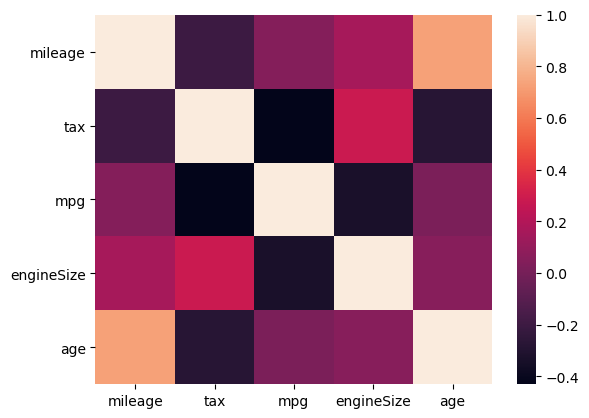

In [161]:
from matplotlib import pyplot as plt
corr = ty[vars_c].corr()
sns.heatmap(corr)
plt.show()

In [162]:
# Según el método de correlación con las variables con más de 0.25 en la correlación con la variable objetivo
# Por lo anterior el cojunto de variabels de interés se reduce
# Podemos supononer que esto es exlusivo de la marca toyota debido al rango de precios y características de sus autos, por lo que podemos verificar que se cumpla esto para los
# Otros dos datasets

# vars_c = ['engineSize', 'age', 'mileage']

audi[vars_c].corrwith(audi['price'])

mileage      -0.535357
tax           0.356157
mpg          -0.600334
engineSize    0.591262
age          -0.592581
dtype: float64

In [163]:
bmw[vars_c].corrwith(bmw['price'])

mileage      -0.605397
tax           0.263484
mpg          -0.204882
engineSize    0.460196
age          -0.623756
dtype: float64

In [164]:
vars_ty = ['mileage', 'engineSize', 'age']
vars_audi = ['mileage', 'mpg', 'engineSize', 'age']
vars_bmw = ['mileage', 'engineSize', 'age']

# Modelado para Toyota

In [165]:
ty = simple_linear_regression(ty, vars_ty, 'price')
ty = lasso(ty, vars_ty, 'price')
ty = lars(ty, vars_ty, 'price')
ty = ridge(ty, vars_ty, 'price')

Simple lineal regresssion
Por cada kilómetro, se pierden 0.038 dólares
Por cada año que pasa, se pierden 1058.031 dólares
****************************************************************************************************
Se pierde $1 USD cada 26.163 kilómetros
Se pierde $1 USD cada 0.00095 años o bien... 8.322 horas
lasso
Por cada kilómetro, se pierden 0.038 dólares
Por cada año que pasa, se pierden 1057.892 dólares
****************************************************************************************************
Se pierde $1 USD cada 26.163 kilómetros
Se pierde $1 USD cada 0.00095 años o bien... 8.322 horas
lars
Por cada kilómetro, se pierden 0.038 dólares
Por cada año que pasa, se pierden 1058.031 dólares
****************************************************************************************************
Se pierde $1 USD cada 26.163 kilómetros
Se pierde $1 USD cada 0.00095 años o bien... 8.322 horas
ridge
Por cada kilómetro, se pierden 0.038 dólares
Por cada año que pasa, se pier

In [166]:
ty = elastic(ty, vars_ty, 'price')

elasticNet
Por cada kilómetro, se pierden 0.019 dólares
Por cada año que pasa, se pierden 1068.748 dólares
****************************************************************************************************
Se pierde $1 USD cada 53.919 kilómetros
Se pierde $1 USD cada 0.00094 años o bien... 8.2344 horas


In [167]:
ty

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age,predictions_slr,residuals_slr,predictions_lasso,residuals_lasso,predictions_lars,residuals_lars,predictions_ridge,residuals_ridge,predictions_elastic,residuals_elastic
0,GT86,2016.0,16000.0,Manual,24089.0,Petrol,265.0,36.2,2,6.0,19982.818901,-3982.818901,19979.474923,-3979.474923,19982.818901,-3982.818901,19977.816094,-3977.816094,14456.251336,1543.748664
1,GT86,2017.0,15995.0,Manual,18615.0,Petrol,145.0,36.2,2,5.0,21250.077678,-5255.077678,21246.594376,-5251.594376,21250.077678,-5255.077678,21245.026079,-5250.026079,15626.522690,368.477310
2,GT86,2015.0,13998.0,Manual,27469.0,Petrol,265.0,36.2,2,7.0,18795.597187,-4797.597187,18792.392546,-4794.392546,18795.597187,-4797.597187,18790.593812,-4792.593812,13324.816347,673.183653
3,GT86,2017.0,18998.0,Manual,14736.0,Petrol,150.0,36.2,2,5.0,21398.341176,-2400.341176,21394.857901,-2396.857901,21398.341176,-2400.341176,21393.198140,-2395.198140,15698.464550,3299.535450
4,GT86,2017.0,17498.0,Manual,36284.0,Petrol,145.0,36.2,2,5.0,20574.731518,-3076.731518,20571.248098,-3073.248098,20574.731518,-3076.731518,20570.096418,-3072.096418,15298.824642,2199.175358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011.0,5500.0,Automatic,30000.0,Petrol,20.0,58.9,1,11.0,4919.339966,580.660034,4920.659657,579.340343,4919.339966,580.660034,4919.794938,580.205062,5832.008806,-332.008806
6734,Urban Cruiser,2011.0,4985.0,Manual,36154.0,Petrol,125.0,50.4,1,11.0,4684.121206,300.878794,4685.440855,299.559145,4684.121206,300.878794,4684.721242,300.278758,5717.873666,-732.873666
6735,Urban Cruiser,2012.0,4995.0,Manual,46000.0,Diesel,125.0,57.6,1,10.0,5365.817519,-370.817519,5366.997742,-371.997742,5365.817519,-370.817519,5366.729890,-371.729890,6604.012692,-1609.012692
6736,Urban Cruiser,2011.0,3995.0,Manual,60700.0,Petrol,125.0,50.4,1,11.0,3745.921713,249.078287,3747.241198,247.758802,3745.921713,249.078287,3747.100354,247.899646,5262.631361,-1267.631361


In [168]:
ty[list(ty.filter(like='residuals_'))].describe()

,residuals_slr,residuals_lasso,residuals_lars,residuals_ridge,residuals_elastic
count,6.738000e+03,6.738000e+03,6.738000e+03,6.738000e+03,6.738000e+03
mean,9.862983e-13,6.574872e-13,8.434895e-13,-1.101436e-12,-2.648306e-13
std,4.675293e+03,4.675294e+03,4.675293e+03,4.675294e+03,5.187739e+03
min,-1.385486e+04,-1.384755e+04,-1.385486e+04,-1.384487e+04,-7.888606e+03
25%,-3.422386e+03,-3.422730e+03,-3.422386e+03,-3.422973e+03,-3.815278e+03
50%,-1.279411e+03,-1.279840e+03,-1.279411e+03,-1.280316e+03,-1.506869e+03
75%,2.489409e+03,2.488507e+03,2.489409e+03,2.488661e+03,2.706200e+03
max,3.095158e+04,3.095534e+04,3.095158e+04,3.095688e+04,3.889864e+04


In [169]:
audi = simple_linear_regression(audi, vars_audi, 'price')
audi = lasso(audi, vars_audi, 'price')
audi = lars(audi, vars_audi, 'price')
audi = ridge(audi, vars_audi, 'price')

Simple lineal regresssion
Por cada kilómetro, se pierden 0.093 dólares
Por cada año que pasa, se pierden 2142.175 dólares
****************************************************************************************************
Se pierde $1 USD cada 10.696 kilómetros
Se pierde $1 USD cada 0.00047 años o bien... 4.1172 horas
lasso
Por cada kilómetro, se pierden 0.094 dólares
Por cada año que pasa, se pierden 2141.901 dólares
****************************************************************************************************
Se pierde $1 USD cada 10.695 kilómetros
Se pierde $1 USD cada 0.00047 años o bien... 4.1172 horas
lars
Por cada kilómetro, se pierden 0.093 dólares
Por cada año que pasa, se pierden 2142.175 dólares
****************************************************************************************************
Se pierde $1 USD cada 10.696 kilómetros
Se pierde $1 USD cada 0.00047 años o bien... 4.1172 horas
ridge
Por cada kilómetro, se pierden 0.093 dólares
Por cada año que pasa, se p

In [170]:
audi = elastic(audi, vars_audi, 'price')

elasticNet
Por cada kilómetro, se pierden 0.079 dólares
Por cada año que pasa, se pierden 1894.703 dólares
****************************************************************************************************
Se pierde $1 USD cada 12.62 kilómetros
Se pierde $1 USD cada 0.00053 años o bien... 4.642799999999999 horas


In [171]:
audi[list(audi.filter(like='residuals'))].describe()

,residuals_slr,residuals_lasso,residuals_lars,residuals_ridge,residuals_elastic
count,1.066800e+04,1.066800e+04,1.066800e+04,1.066800e+04,1.066800e+04
mean,-1.067727e-12,1.664508e-12,1.533728e-12,5.571039e-12,3.839861e-13
std,5.597537e+03,5.597537e+03,5.597537e+03,5.597537e+03,6.205127e+03
min,-3.682671e+04,-3.682091e+04,-3.682671e+04,-3.682041e+04,-1.884511e+04
25%,-2.687269e+03,-2.686940e+03,-2.687269e+03,-2.687193e+03,-3.163058e+03
50%,-4.979927e+02,-4.980960e+02,-4.979927e+02,-4.980586e+02,-8.783284e+02
75%,1.991933e+03,1.991371e+03,1.991933e+03,1.991087e+03,1.456927e+03
max,7.389053e+04,7.389549e+04,7.389053e+04,7.389528e+04,8.771824e+04


In [172]:
bmw = simple_linear_regression(bmw, vars_bmw, 'price')
bmw = lasso(bmw, vars_bmw, 'price')
bmw = lars(bmw, vars_bmw, 'price')
bmw = ridge(bmw, vars_bmw, 'price')

Simple lineal regresssion
Por cada kilómetro, se pierden 0.127 dólares
Por cada año que pasa, se pierden 2042.592 dólares
****************************************************************************************************
Se pierde $1 USD cada 7.902 kilómetros
Se pierde $1 USD cada 0.00049 años o bien... 4.2924 horas
lasso
Por cada kilómetro, se pierden 0.127 dólares
Por cada año que pasa, se pierden 2042.338 dólares
****************************************************************************************************
Se pierde $1 USD cada 7.901 kilómetros
Se pierde $1 USD cada 0.00049 años o bien... 4.2924 horas
lars
Por cada kilómetro, se pierden 0.127 dólares
Por cada año que pasa, se pierden 2042.592 dólares
****************************************************************************************************
Se pierde $1 USD cada 7.902 kilómetros
Se pierde $1 USD cada 0.00049 años o bien... 4.2924 horas
ridge
Por cada kilómetro, se pierden 0.127 dólares
Por cada año que pasa, se pier

In [173]:
bmw = elastic(bmw, vars_bmw, 'price')

elasticNet
Por cada kilómetro, se pierden 0.147 dólares
Por cada año que pasa, se pierden 1769.081 dólares
****************************************************************************************************
Se pierde $1 USD cada 6.822 kilómetros
Se pierde $1 USD cada 0.00057 años o bien... 4.9932 horas


 # Análisis de resuduales

In [178]:
audi[list(audi.filter(like='residuals_'))].describe(percentiles=[i/10 for i in range(11)])

,residuals_slr,residuals_lasso,residuals_lars,residuals_ridge,residuals_elastic
count,1.066800e+04,1.066800e+04,1.066800e+04,1.066800e+04,1.066800e+04
mean,-1.067727e-12,1.664508e-12,1.533728e-12,5.571039e-12,3.839861e-13
std,5.597537e+03,5.597537e+03,5.597537e+03,5.597537e+03,6.205127e+03
min,-3.682671e+04,-3.682091e+04,-3.682671e+04,-3.682041e+04,-1.884511e+04
0%,-3.682671e+04,-3.682091e+04,-3.682671e+04,-3.682041e+04,-1.884511e+04
10%,-5.017781e+03,-5.018036e+03,-5.017781e+03,-5.018158e+03,-5.080271e+03
20%,-3.261040e+03,-3.261044e+03,-3.261040e+03,-3.261069e+03,-3.676874e+03
30%,-2.185519e+03,-2.184943e+03,-2.185519e+03,-2.185217e+03,-2.659989e+03
40%,-1.351522e+03,-1.351230e+03,-1.351522e+03,-1.351168e+03,-1.736665e+03
50%,-4.979927e+02,-4.980960e+02,-4.979927e+02,-4.980586e+02,-8.783284e+02


In [179]:
bmw[list(bmw.filter(like='residuals_'))].describe(percentiles=[i/10 for i in range(11)])

,residuals_slr,residuals_lasso,residuals_lars,residuals_ridge,residuals_elastic
count,1.078100e+04,1.078100e+04,1.078100e+04,1.078100e+04,1.078100e+04
mean,-8.851144e-13,8.019346e-13,-1.088930e-12,-8.036218e-13,-4.592607e-13
std,6.778002e+03,6.778002e+03,6.778002e+03,6.778002e+03,7.206124e+03
min,-1.829772e+04,-1.829773e+04,-1.829772e+04,-1.829790e+04,-1.874817e+04
0%,-1.829772e+04,-1.829773e+04,-1.829772e+04,-1.829790e+04,-1.874817e+04
10%,-6.740304e+03,-6.740485e+03,-6.740304e+03,-6.740529e+03,-6.361354e+03
20%,-4.483520e+03,-4.483635e+03,-4.483520e+03,-4.483727e+03,-4.968088e+03
30%,-3.079469e+03,-3.079127e+03,-3.079469e+03,-3.079678e+03,-3.809290e+03
40%,-1.983884e+03,-1.984049e+03,-1.983884e+03,-1.984104e+03,-2.744975e+03
50%,-9.658901e+02,-9.664229e+02,-9.658901e+02,-9.662061e+02,-1.647775e+03


In [180]:
ty[list(ty.filter(like='residuals_'))].describe(percentiles=[i/10 for i in range(11)])

,residuals_slr,residuals_lasso,residuals_lars,residuals_ridge,residuals_elastic
count,6.738000e+03,6.738000e+03,6.738000e+03,6.738000e+03,6.738000e+03
mean,9.862983e-13,6.574872e-13,8.434895e-13,-1.101436e-12,-2.648306e-13
std,4.675293e+03,4.675294e+03,4.675293e+03,4.675294e+03,5.187739e+03
min,-1.385486e+04,-1.384755e+04,-1.385486e+04,-1.384487e+04,-7.888606e+03
0%,-1.385486e+04,-1.384755e+04,-1.385486e+04,-1.384487e+04,-7.888606e+03
10%,-4.727822e+03,-4.728222e+03,-4.727822e+03,-4.728306e+03,-5.118696e+03
20%,-3.872991e+03,-3.873531e+03,-3.872991e+03,-3.873695e+03,-4.301184e+03
30%,-2.922401e+03,-2.922982e+03,-2.922401e+03,-2.922142e+03,-3.366683e+03
40%,-2.130515e+03,-2.131208e+03,-2.130515e+03,-2.131370e+03,-2.567012e+03
50%,-1.279411e+03,-1.279840e+03,-1.279411e+03,-1.280316e+03,-1.506869e+03


## Regresión logística

In [182]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import os

ty.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age,predictions_slr,residuals_slr,predictions_lasso,residuals_lasso,predictions_lars,residuals_lars,predictions_ridge,residuals_ridge,predictions_elastic,residuals_elastic
0,GT86,2016.0,16000.0,Manual,24089.0,Petrol,265.0,36.2,2,6.0,19982.818901,-3982.818901,19979.474923,-3979.474923,19982.818901,-3982.818901,19977.816094,-3977.816094,14456.251336,1543.748664
1,GT86,2017.0,15995.0,Manual,18615.0,Petrol,145.0,36.2,2,5.0,21250.077678,-5255.077678,21246.594376,-5251.594376,21250.077678,-5255.077678,21245.026079,-5250.026079,15626.522690,368.477310
2,GT86,2015.0,13998.0,Manual,27469.0,Petrol,265.0,36.2,2,7.0,18795.597187,-4797.597187,18792.392546,-4794.392546,18795.597187,-4797.597187,18790.593812,-4792.593812,13324.816347,673.183653


In [184]:
bmw['tar'] = np.where(bmw['fuelType']=='Hybrid', 1, 0)
bmw.tar.value_counts()

0    10483
1      298
Name: tar, dtype: int64

In [185]:
vars_c = ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age']

In [186]:
from sklearn.feature_selection import VarianceThreshold
X = bmw[vars_c]
features = VarianceThreshold(threshold=0.8 * (1 - 0.8))
features.fit_transform(X)

array([[1.1200e+04, 6.7068e+04, 1.2500e+02, 5.7600e+01, 2.0000e+00,
        8.0000e+00],
       [2.7000e+04, 1.4827e+04, 1.4500e+02, 4.2800e+01, 2.0000e+00,
        4.0000e+00],
       [1.6000e+04, 6.2794e+04, 1.6000e+02, 5.1400e+01, 3.0000e+00,
        6.0000e+00],
       ...,
       [1.3100e+04, 2.5468e+04, 2.0000e+02, 4.2800e+01, 2.0000e+00,
        5.0000e+00],
       [9.9300e+03, 4.5000e+04, 3.0000e+01, 6.4200e+01, 2.0000e+00,
        8.0000e+00],
       [1.5981e+04, 5.9432e+04, 1.2500e+02, 5.7600e+01, 2.0000e+00,
        5.0000e+00]])

In [188]:
bmw[vars_c].head(3)

,price,mileage,tax,mpg,engineSize,age
0,11200.0,67068.0,125.0,57.6,2.0,8.0
1,27000.0,14827.0,145.0,42.8,2.0,4.0
2,16000.0,62794.0,160.0,51.4,3.0,6.0


In [189]:
log_reg = LogisticRegressionCV()
X = bmw[['price', 'tax', 'mpg', 'engineSize']].copy()
y = bmw['tar'].copy()

log_reg.fit(X,y)

LogisticRegressionCV()

In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(y, log_reg.predict(X))

0.9882200166960393